In [12]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from cmath import sqrt
import warnings
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import sklearn
#import folium
import warnings
#import pydotplus
import six
import sys
import statistics as st
#import functions as fn
#import cufflinks as cf

#cf.set_config_file(offline=True)

#prof.to_file(output_file='output.html')
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings('ignore')

# import ML packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
#from explainerdashboard import RegressionExplainer, ExplainerDashboard

#for interactive analysis
from ipywidgets import interact

%matplotlib inline

# IRISH Crops Dataset

In [2]:
#Reading in Irish Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
irelandagri_crops = pd.read_csv('FAOSTAT_data_5-1-2022 (2).csv')
irelandagri_crops.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2018,ha,0.0
1,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2019,ha,0.0
2,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2020,ha,0.0
3,Crops and livestock products,Ireland,Production,"Almonds, with shell",2018,tonnes,0.0
4,Crops and livestock products,Ireland,Production,"Almonds, with shell",2019,tonnes,0.0


In [3]:
#reading the last 5 rows of the dataframe
irelandagri_crops.tail()

,Domain,Area,Element,Item,Year,Unit,Value
2124,Crops and livestock products,Ireland,Production,"Wool, greasy",2013,tonnes,14000.0
2125,Crops and livestock products,Ireland,Production,"Wool, greasy",2014,tonnes,14031.0
2126,Crops and livestock products,Ireland,Production,"Wool, greasy",2015,tonnes,14123.0
2127,Crops and livestock products,Ireland,Production,"Wool, greasy",2016,tonnes,14330.0
2128,Crops and livestock products,Ireland,Production,"Wool, greasy",2017,tonnes,14436.0


In [4]:
# description of variables
irelandagri_crops.describe()

,Year,Value
count,2129.000000,1.985000e+03
mean,2015.056364,3.845486e+05
std,3.161180,1.060809e+06
min,2010.000000,0.000000e+00
25%,2012.000000,2.220000e+02
50%,2015.000000,9.600000e+03
75%,2018.000000,9.500000e+04
max,2020.000000,8.561470e+06


In [5]:
# remove nan or missing values from multiple colu
irelandagri_crops =  irelandagri_crops.dropna()
irelandagri_crops.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2018,ha,0.0
1,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2019,ha,0.0
2,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2020,ha,0.0
3,Crops and livestock products,Ireland,Production,"Almonds, with shell",2018,tonnes,0.0
4,Crops and livestock products,Ireland,Production,"Almonds, with shell",2019,tonnes,0.0


In [6]:
# inspect dataset information and datatypes
irelandagri_crops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2128
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   1985 non-null   object 
 1   Area     1985 non-null   object 
 2   Element  1985 non-null   object 
 3   Item     1985 non-null   object 
 4   Year     1985 non-null   int64  
 5   Unit     1985 non-null   object 
 6   Value    1985 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 124.1+ KB


In [7]:
# Get the shape of the irish crops dataset before we merge
irelandagri_crops.shape

(1985, 7)

I am concentrating on crops so I have removed livestock and non crops that appear under the column item

In [9]:
# Dropping the rows of all rows under item that do not contain crops but contain livestock etc.
irelandagri_crops= irelandagri_crops[irelandagri_crops["Item"].str.contains("Asses|Beer of barley|Cattle|skimmed cow milk|Cheese, whole cow milk|Chickens|Cream fresh|Ducks|Eggs, hen, in shell|Fat, cattle|Fat, pigs|Fat, sheep|Geese and guinea fowls|Goats|Hides, cattle, fresh|Honey, natural|Hops|Horses|Lard|Margarine, short|Meat nes|Meat, cattle|Meat, chicken|Meat, duck Meat, goose and guinea fowl|Meat, horse|Meat, pig|Meat, sheep|Meat, turkey|Milk, skimmed cow|Milk, skimmed dried|Milk, whole condensed|Milk, whole dried|Milk, whole evaporated|Milk, whole fresh cow|Mules|Offals, edible, cattle|Offals, horses|Offals, pigs, edible|Offals, sheep,edible|Oil, coconut (copra)|Oil, cottonseed|Oil, groundnut|Oil, linseed|Oil, palm kernel|Oil, rapeseed|Oil, soybean|Pigs|Rapeseed|Sheep|Skins, sheep, fresh|Sugar Raw Centrifugal|Tallow|Turkeys|fresh nes|Whey, condensed|Wool, greasy|Molasses|Almonds, with shell|Buffaloes|Cottonseed|Fat, goats|Hemp tow waste|Meat, goat|Milk, whole fresh buffalo|Milk, whole fresh goat|Milk, whole fresh sheep|Offals, edible, goats|paddy (rice milled equivalent)|Skins, goat, fresh|Sorghum|Tobacco, unmanufactured|Triticale|Meat, duck|Meat, goose and guinea fowl") == False]
# display
irelandagri_crops

C:\Users\chris\AppData\Local\Temp\ipykernel_10308\2787367993.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  irelandagri_crops= irelandagri_crops[irelandagri_crops["Item"].str.contains("Asses|Beer of barley|Cattle|skimmed cow milk|Cheese, whole cow milk|Chickens|Cream fresh|Ducks|Eggs, hen, in shell|Fat, cattle|Fat, pigs|Fat, sheep|Geese and guinea fowls|Goats|Hides, cattle, fresh|Honey, natural|Hops|Horses|Lard|Margarine, short|Meat nes|Meat, cattle|Meat, chicken|Meat, duck Meat, goose and guinea fowl|Meat, horse|Meat, pig|Meat, sheep|Meat, turkey|Milk, skimmed cow|Milk, skimmed dried|Milk, whole condensed|Milk, whole dried|Milk, whole evaporated|Milk, whole fresh cow|Mules|Offals, edible, cattle|Offals, horses|Offals, pigs, edible|Offals, sheep,edible|Oil, coconut (copra)|Oil, cottonseed|Oil, groundnut|Oil, linseed|Oil, palm kernel|Oil, rapeseed|Oil, soybean|Pigs|Rapeseed|Sheep|Skins, sheep, 

,Domain,Area,Element,Item,Year,Unit,Value
6,Crops and livestock products,Ireland,Area harvested,Apples,2010,ha,620.0
7,Crops and livestock products,Ireland,Area harvested,Apples,2011,ha,620.0
8,Crops and livestock products,Ireland,Area harvested,Apples,2012,ha,620.0
9,Crops and livestock products,Ireland,Area harvested,Apples,2013,ha,615.0
10,Crops and livestock products,Ireland,Area harvested,Apples,2014,ha,635.0
...,...,...,...,...,...,...,...
2116,Crops and livestock products,Ireland,Production,"Whey, dry",2013,tonnes,30100.0
2117,Crops and livestock products,Ireland,Production,"Whey, dry",2014,tonnes,31530.0
2118,Crops and livestock products,Ireland,Production,"Whey, dry",2015,tonnes,34856.0
2119,Crops and livestock products,Ireland,Production,"Whey, dry",2016,tonnes,34416.0


# Irish import export Dataset

In [10]:
irish_IE = pd.read_csv('Import&Export.csv')
irish_IE.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
4,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",99,Unknown,Euro Million,NaN


# I am concentrating on Agriculture so I have removed non agriculture sectors that appear under the column sector of activity

In [13]:
# Dropping the rows of all rows under item that do not contain crops but contain livestock etc.
irish_IE= irish_IE[irish_IE["Sector of Activity"].str.contains("Asses|Chemicals and Pharmaceuticals (20-21)|Other Manufacturing and Construction (05-09, 12-19, 22-43)|Wholesale and Retail (45-47)|Services/other (49-98)|Unknown") == False]
# display
irish_IE

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
4,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",99,Unknown,Euro Million,NaN
...,...,...,...,...,...,...,...,...,...,...
667,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,01,Small (10 to 49),Number,8262.0
668,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,02,Medium (50 to 249),Number,2099.0
669,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,03,Large (250 or more),Number,646.0
670,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,99,Unknown,Number,174.0


In [14]:
irish_IE.isnull()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
667,False,False,False,False,False,False,False,False,False,False
668,False,False,False,False,False,False,False,False,False,False
669,False,False,False,False,False,False,False,False,False,False
670,False,False,False,False,False,False,False,False,False,False


We can see from the above table the null values in our dataset. False means the value is not null True means The value is null

In [15]:
irish_IE.isnull().sum()

STATISTIC              0
Statistic Label        0
TLIST(A1)              0
Year                   0
C03530V04258           0
Sector of Activity     0
C03066V03701           0
Size of Enterprise     0
UNIT                   0
VALUE                 80
dtype: int64

We can see from the above table that there are so many null values in the VALUE column. 

<AxesSubplot:>

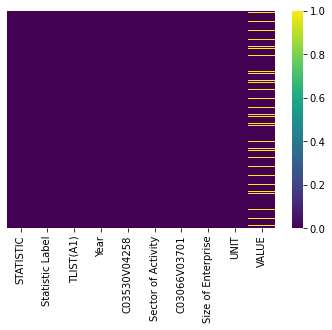

In [17]:
sns.heatmap(irish_IE.isnull(), yticklabels=False, cmap='viridis')

In [18]:
# remove nan or missing values from multiple columns
irish_IE =  irish_IE.dropna()
irish_IE.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
5,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",-,All Enterprises,Euro Million,17923.0


<AxesSubplot:>

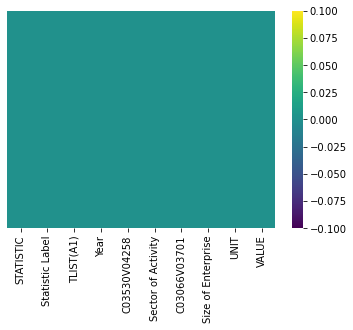

In [19]:
sns.heatmap(irish_IE.isnull(), yticklabels=False, cmap='viridis')